In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statistics as stat
import math
from scipy.stats import ttest_1samp
from statsmodels.stats import weightstats as stests
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn import linear_model
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

Exercise 4.35 (15 points) An article in Solid State Technology (May 1987)
describes an experiment to determine the effect of
flow rate on etch uniformity on a silicon wafer
used in integrated-circuit manufacturing. Three flow
rates are tested, and the resulting uniformity (in percent) is observed for six test units at each flow rate.
The data are shown in Table 4E.4.
(a) Does flow rate affect etch uniformity?
Answer this question by using an analysis of
variance with
(b) Construct a box plot of the etch uniformity data.
Use this plot, together with the analysis of variance results, to determine which gas flow rate
would be best in terms of etch uniformity (a
small percentage is best).
(c) Plot the residuals versus predicted flow.
Interpret this plot.
(d) Does the normality assumption seem reasonable
in this problem?

In [71]:
df = pd.read_csv('/content/hw3.csv') 

df = df.astype(float) 
df

,Observations,flow,uni
0,1.0,125.0,2.7
1,2.0,125.0,2.6
2,3.0,125.0,4.6
3,4.0,125.0,3.2
4,5.0,125.0,3.0
5,6.0,125.0,3.8
6,7.0,160.0,4.6
7,8.0,160.0,4.9
8,9.0,160.0,5.0
9,10.0,160.0,4.2


4.35 part A

In [72]:
a=df[df['flow']==125]['uni']
a


0    2.7
1    2.6
2    4.6
3    3.2
4    3.0
5    3.8
Name: uni, dtype: float64

In [106]:
m1= a.mean()
m1

3.316666666666667

In [73]:
b=df[df['flow']==160]['uni']
b

6     4.6
7     4.9
8     5.0
9     4.2
10    3.6
11    4.2
Name: uni, dtype: float64

In [107]:
m2= b.mean()
m2

4.416666666666667

In [74]:
c=df[df['flow']==200]['uni']
c


12    4.6
13    2.9
14    3.4
15    3.5
16    4.1
17    5.1
Name: uni, dtype: float64

In [137]:
m3= c.mean()
m3

3.9333333333333336

In [109]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Observations  18 non-null     float64
 1   flow          18 non-null     float64
 2   uni           18 non-null     float64
dtypes: float64(3)
memory usage: 560.0 bytes


In [111]:
stat, p = f_oneway(a, b, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
  print('probably the same distribution')
else:
  print('probably different distribution')


stat=3.586, p=0.053
probably the same distribution


In [112]:
model = ols('uni ~ C(flow)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [113]:
(print(model.summary()))


                            OLS Regression Results                            
Dep. Variable:                    uni   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Thu, 22 Sep 2022   Prob (F-statistic):             0.0534
Time:                        22:02:51   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3167      0.291  

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


looking at the summary the flow rate does not a major contributor to the unforminty but it is a minor contributor with p vaule .053

4.35 B we will choose 125 because it has a lower uniformity percentage and that is what we want

In [214]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F)
C(flow),3.647778,2.0,1.823889,3.585627,0.053365
Residual,7.630000,15.0,0.508667,NaN,NaN


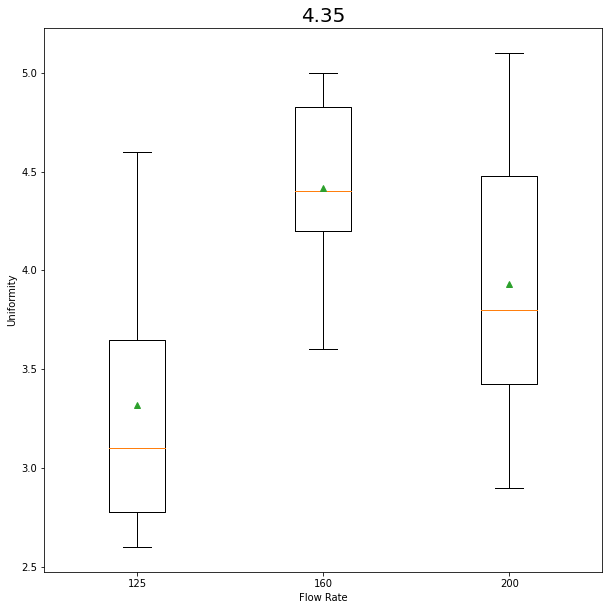

In [110]:

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("4.35", fontsize= 20)
ax.set


data2=[a, b, c]

ax.boxplot(data2,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.xlabel("Flow Rate")
plt.ylabel("Uniformity")

plt.show()

4.35 part C

In [114]:
predict=model.predict()
predict

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [115]:
model.rsquared

0.32344827586206915

In [116]:
model.rsquared_adj

0.23324137931034505

In [117]:
residuals=model.resid
residuals

0    -0.616667
1    -0.716667
2     1.283333
3    -0.116667
4    -0.316667
5     0.483333
6     0.183333
7     0.483333
8     0.583333
9    -0.216667
10   -0.816667
11   -0.216667
12    0.666667
13   -1.033333
14   -0.533333
15   -0.433333
16    0.166667
17    1.166667
dtype: float64

In [118]:
se= model.mse_resid
se

0.5086666666666665

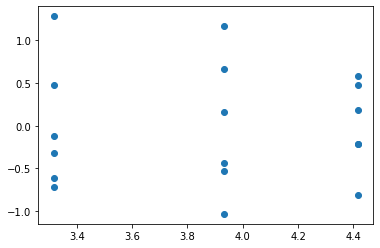

In [119]:
plt.scatter(predict, residuals)

plt.show()

4.35 Part D

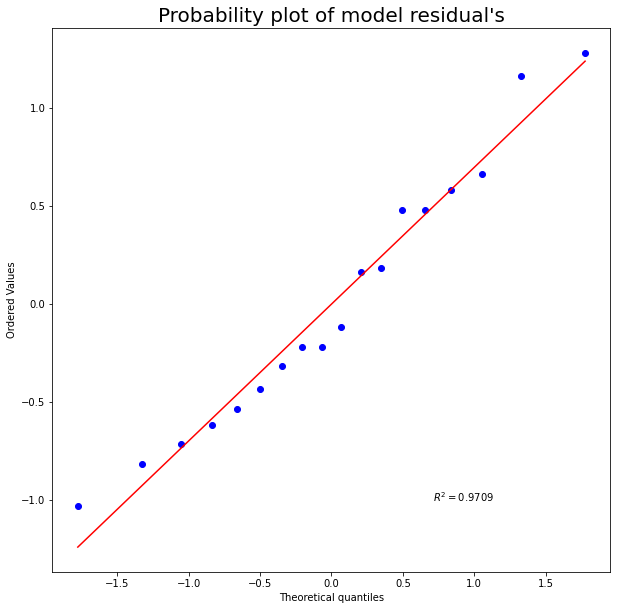

In [120]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

it is close to the line so it is normal

4.36 (5 points) Compare the mean etch uniformity values at each of
the flow rates from Exercise 4.33 with a scaled
t distribution. Does this analysis indicate that there
are differences in mean etch uniformity at the different flow rates? Which flows produce different
results?

In [204]:
m1, m2, m3

(3.316666666666667, 4.416666666666667, 3.9333333333333336)

In [218]:
resmean2 = 	0.508667
n = 6
scale = math.sqrt(resmean2/n)
scale

0.291166332760732

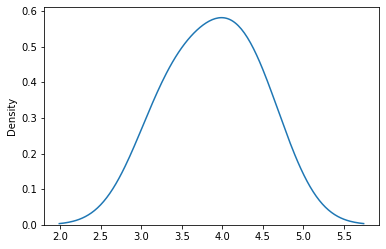

In [223]:
sns.kdeplot((m1,m2,m3))

so considering our scale factor is .3 and the looking at our graph. it looks normal, not outliers 

4.53 upper bounds on the P-value for the following
observed values of the test statistic:

In [121]:
X = 31.400
m = 30
se_mean = .336
z = (X-m)/se_mean
z 

4.1666666666666625

In [122]:
scipy.stats.norm.sf((z))*2

3.09085937645925e-05

(15 points) Exercise 4.47 The brake horsepower developed by an automobile
engine on a dynamometer is thought to be a function
of the engine speed in revolutions per minute (rpm),
the road octane number of the fuel, and the engine
compression. An experiment is run in the laboratory
and the data are drawn in Table 4E.10:
(a) Fit a multiple regression model to these data.
(b) Test for significance of regression. What conclusions can you draw?
(c) Based on t-tests, do you need all three regressor
variables in the model?

In [189]:
df2 = pd.read_csv('/content/automoblie engine data - Sheet1 (1).csv') 

df2 = df.astype(int) 

df2


,Brake,RPM,Road,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


4.47 A

In [191]:
Brake = df2['Brake']
RPM = df2['RPM']
Road = df2['Road']
Compression = df2['Compression']

In [197]:
model2 = ols('Brake ~ Compression + RPM + Road', data=df2).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
aov_table2

,sum_sq,df,F,PR(>F)
Compression,947.826275,1.0,12.205113,0.008155
RPM,443.443935,1.0,5.710206,0.043883
Road,1070.226974,1.0,13.781261,0.005937
Residual,621.265062,8.0,NaN,NaN


In [198]:
(print(model2.summary()))

                            OLS Regression Results                            
Dep. Variable:                  Brake   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Thu, 22 Sep 2022   Prob (F-statistic):            0.00317
Time:                        23:20:08   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


4.47 B

the f stat is 11.12. which means we have a low p value. so that means we reject the null hypothesis 

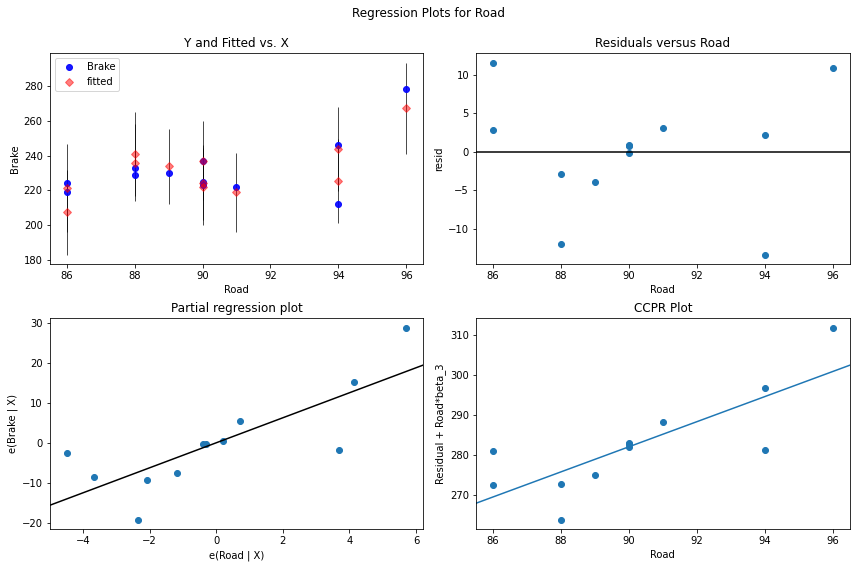

In [202]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model2, 'Road', fig=fig)

4.47 (C) Since Compression, RPM, Road all have a P value of less than .o5 (.008, .044, .006) this means all three are necessary to this analysis    